In [1]:
# Data Preprocessing Ryazanova Tanya

In [1]:
# Уберем CustomerID.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Импортируем датасет.
df = pd.read_csv('Exam2.csv', sep=',')
df = df.drop(['CustomerID'], axis=1)

In [3]:
# Загружено: 
df

,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,Male,19,15,0
1,Male,21,15,1
2,Female,20,16,0
3,Female,23,16,1
4,Female,31,17,0
...,...,...,...,...
195,Female,35,120,1
196,Female,45,126,0
197,Male,32,126,1
198,Male,32,137,0


In [4]:
# Произведем кодиррование наших качественных перменных только в столбце Gender.
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [5]:
df = encoding_char(df)

In [6]:
df

,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,0,19,15,0
1,0,21,15,1
2,1,20,16,0
3,1,23,16,1
4,1,31,17,0
...,...,...,...,...
195,1,35,120,1
196,1,45,126,0
197,0,32,126,1
198,0,32,137,0


In [7]:
# Шкалируем в диапозоне  от 0 до 1.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['Genre','Age','AnnualIncome(k$)','SpendingScore(1-100)']).round()

,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
195,1.0,0.0,1.0,1.0
196,1.0,1.0,1.0,0.0
197,0.0,0.0,1.0,1.0
198,0.0,0.0,1.0,0.0


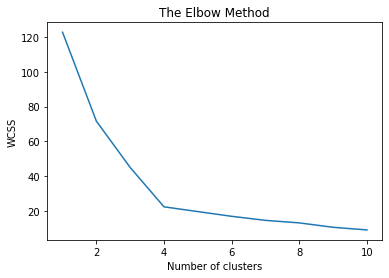

In [8]:
# Наибольшее падение начинается от 4-x кластеров. Далее используем метод силуэта. 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

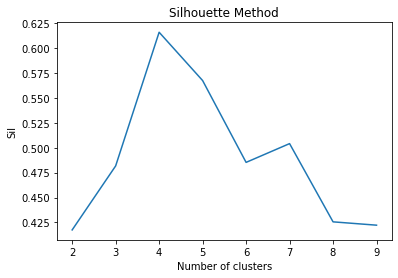

2:0.41755274186389024
3:0.4817591310765286
4:0.6158611299633825
5:0.5674065694606566
6:0.4853093642949461
7:0.5041321637467567
8:0.4256469854118077
9:0.4223057212293877


In [9]:
# На 4-х кластерах значение = 0,6797733098928154.
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 10):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 10), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [10]:
# Метод К средних  
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 4, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['Genre','Age','AnnualIncome(k$)','SpendingScore(1-100)']).round()

,Genre,Age,AnnualIncome(k$),SpendingScore(1-100)
0,0.0,1.0,0.0,-0.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,-0.0
3,0.0,0.0,0.0,1.0


In [11]:
# 2 переменные:
X = df[:, [0,3]]

In [13]:
km = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 4, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['Genre','SpendingScore(1-100)']).round()

,Genre,SpendingScore(1-100)
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0
3,0.0,1.0


In [14]:
#Сравним резльтаты 
import pickle
obj = {'km': km}
output = open('clust-km.pkl', 'wb')
pickle.dump(obj, output, 4)
output.close()

In [15]:
# Прошкалируем данные: 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(df)
df = sc.transform(df)

In [16]:
X = df[:, [0,3]]

In [17]:
pip install SimpSOM

  Created wheel for SimpSOM: filename=SimpSOM-1.3.4-py3-none-any.whl size=15524 sha256=4807416c2ab6c664ecf9e7441950182de6b8224998a0eec2685d3dec587c1b75
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\48\b1\18\984099a899a77ba58bf75a998e1253e93eb2c13584644ac598
Successfully built SimpSOM
Note: you may need to restart the kernel to use updated packages.


In [29]:
#Модель на 10000 случаях:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 10, X, PBC=True)
net.train(0.01,10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!       


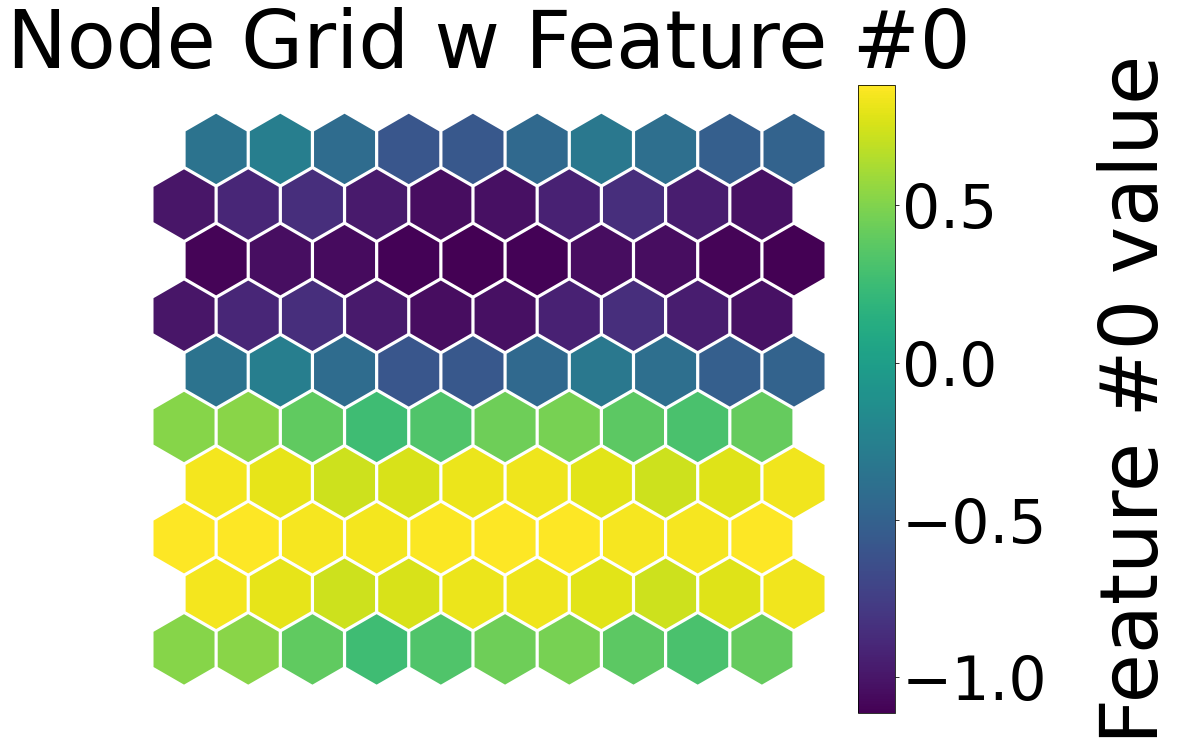

In [30]:
net.nodes_graph(colnum=0)

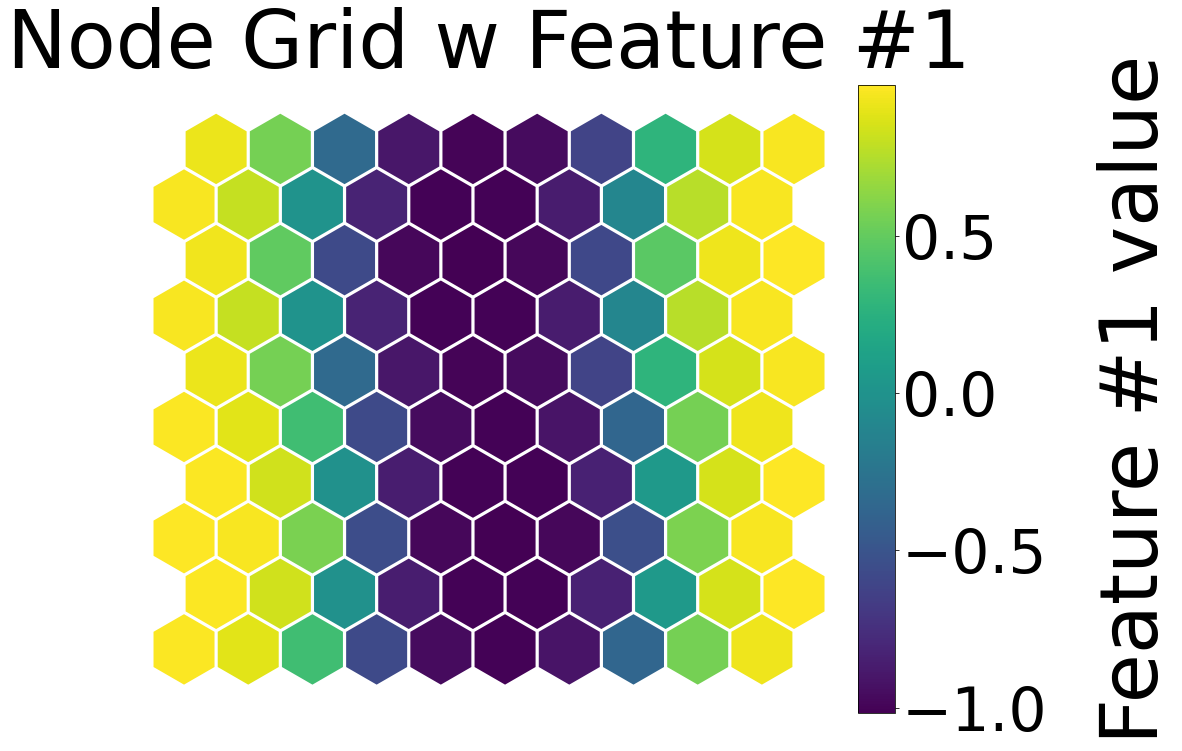

In [31]:
net.nodes_graph(colnum=1)

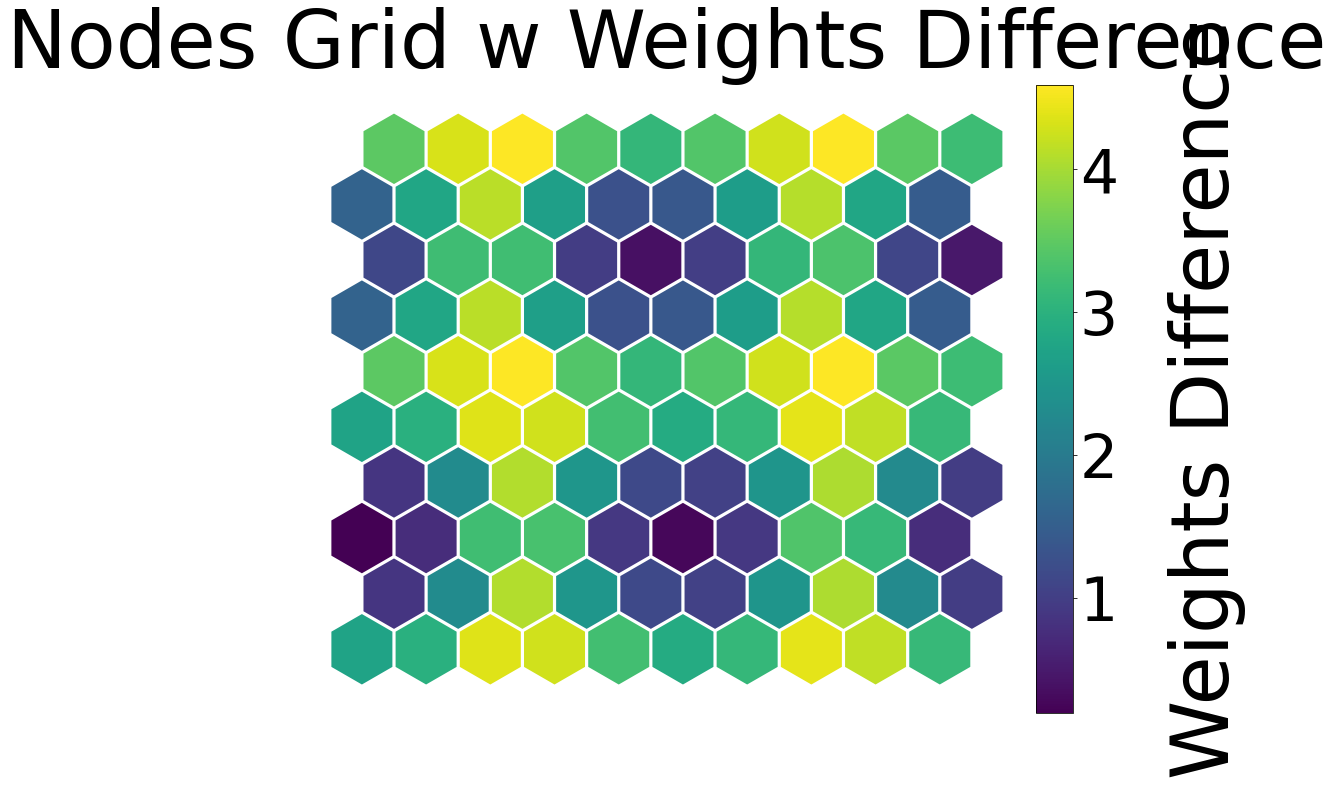

In [32]:
net.diff_graph()

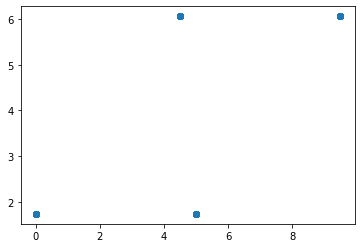

In [33]:
# Мужчины имеют SpendingScore 0/1, женщины - 0/1
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [34]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(prj)

In [35]:
# Importing km clusters
import pickle
input = open('clust-km.pkl', 'rb')
obj = pickle.load(input)
input.close()
km = obj["km"]

In [36]:
# 36% пациентов (людей) определены верно. 
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

1.0

In [34]:
#Вывод: Проделана работа по кластеризации с помощью метода К средних. С помощью метода локтя и силуэта определили,что нужно брать 4 кластера. Для того что бы определить на сколько точна модель мы сравнием ее с иерархческой кластеризацией обучивши модель на 10000. Как видно больше 100% случаев пересекаются. Точность модели  удовлетворительная.  